converting data frame to numpy and spliting the classes 

In [657]:
import pandas as pd
import numpy as np


In [658]:
df = pd.read_csv('Raisin_Dataset.csv')

df.head(7)
header=[col for col in df]
# reading the csv file

**The number of classes in the dataset**

In [659]:

df['Class']=pd.factorize(df['Class'])[0]
print(df['Class'].nunique())       # gives the number of classes
df.head(450)

2


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
445,61200,323.174410,246.288324,0.647470,64553,0.707449,997.264,0
446,87089,396.486857,280.245450,0.707392,88754,0.742232,1154.562,0
447,59589,383.571233,201.381855,0.851091,62974,0.684082,1043.187,0
448,50312,354.235551,182.312081,0.857392,52070,0.623352,961.439,0


**log odds for the data**

In [660]:
from scipy.special import logit,expit
import numpy as np
cls=df.to_numpy()

x=np.delete(cls,7,1)
c=x
y=np.delete(cls,np.s_[0:7],1)
t=y
np.set_printoptions(suppress=True)
#splits the target classes and the features

In [661]:
k=x


In [662]:
num_keicemen= np.sum(y==0)
num_besni=np.sum(y==1)
num_keicemen+num_besni
cls1=x[0:num_keicemen]
cls2=x[450:900+1]
np.set_printoptions(threshold=np.inf)
cls1
#counting the number of ellements in each class

array([[ 87524.        ,    442.2460114 ,    253.291155  ,
             0.81973839,  90546.        ,      0.75865058,
          1184.04      ],
       [ 75166.        ,    406.690687  ,    243.0324363 ,
             0.80180523,  78789.        ,      0.68412957,
          1121.786     ],
       [ 90856.        ,    442.2670483 ,    266.3283177 ,
             0.79835362,  93717.        ,      0.63761281,
          1208.575     ],
       [ 45928.        ,    286.5405586 ,    208.7600423 ,
             0.68498922,  47336.        ,      0.69959938,
           844.162     ],
       [ 79408.        ,    352.1907699 ,    290.8275329 ,
             0.56401133,  81463.        ,      0.79277193,
          1073.251     ],
       [ 49242.        ,    318.125407  ,    200.12212   ,
             0.77735128,  51368.        ,      0.65845635,
           881.836     ],
       [ 42492.        ,    310.1460715 ,    176.1314494 ,
             0.82309868,  43904.        ,      0.66589356,
           823.796

*Log odds is the sum of log likelihood ratio and log of prior ratio:*

In [663]:
p1=np.count_nonzero(y==0)/y.size
p2=1-p1
# finding the probability 

In [664]:
import math
likelihood=(np.count_nonzero(y==0))/(np.count_nonzero(y==1))
loglikelihood=np.log(likelihood)
logodkeci=loglikelihood+np.log2((p1/(1-p1)))
logodbesn=loglikelihood+np.log2((p2/(1-p2)))
print("log odds of keicimen=",logodkeci)
print("log odds of besni= ",logodbesn)



log odds of keicimen= 0.0
log odds of besni=  0.0


**3 mean vecotor and covariance matrix in each class**

In [665]:
c1trans=cls1.transpose()
c2trans=cls2.transpose()

In [666]:
one=np.ones((450,1))
np.set_printoptions(suppress=True)
m1=np.dot(c1trans,one)*(1/len(one))            #mean of class1
m2=np.dot(c2trans,one)*(1/len(one))            #meanof class 1

mv1=m1.ravel()
print("first class mean",mv1)

mv2=m2.ravel()
print("second  class mean",mv2)
midc1=cls1-mv1
m1
# ravel function to get a straigth array

first class mean [63413.46666667   352.85924899   229.3525921      0.74195954
 65696.35555556     0.70777425   983.68623556]
second  class mean [112194.78888889    509.00065201    279.6236737       0.82112476
 116675.82444444      0.69124161   1348.12703556]


array([[63413.46666667],
       [  352.85924899],
       [  229.3525921 ],
       [    0.74195954],
       [65696.35555556],
       [    0.70777425],
       [  983.68623556]])

In [667]:
cov1=np.cov(cls1,rowvar=False)         # covariance is found in this 

np.set_printoptions(suppress=True)
cov2=np.cov(cls2,rowvar=False)            # cov1 is covariance of class 1 and cov2 is of class 2
np.set_printoptions(threshold=np.inf)
cov1



array([[ 3.14273786e+08,  9.48747383e+05,  5.26930055e+05,
         1.22544439e+02,  3.34178076e+08, -2.07582479e+00,
         2.54722952e+06],
       [ 9.48747383e+05,  3.55353016e+03,  1.18448636e+03,
         2.51733540e+00,  1.03802111e+06, -5.20182414e-01,
         8.54753908e+03],
       [ 5.26930055e+05,  1.18448636e+03,  1.15999213e+03,
        -1.20695931e+00,  5.46132789e+05,  3.02579660e-01,
         3.86602972e+03],
       [ 1.22544439e+02,  2.51733540e+00, -1.20695931e+00,
         8.53068902e-03,  1.67623514e+02, -1.48948577e-03,
         2.94190389e+00],
       [ 3.34178076e+08,  1.03802111e+06,  5.46132789e+05,
         1.67623514e+02,  3.61223925e+08, -4.86447443e+01,
         2.79465818e+06],
       [-2.07582479e+00, -5.20182414e-01,  3.02579660e-01,
        -1.48948577e-03, -4.86447443e+01,  1.88722736e-03,
        -1.03066330e+00],
       [ 2.54722952e+06,  8.54753908e+03,  3.86602972e+03,
         2.94190389e+00,  2.79465818e+06, -1.03066330e+00,
         2.2591752

In [668]:
samples1=np.random.multivariate_normal(mv1,cov1,10)     # this function outputs sample for class 1

*samples for class 1*

In [669]:
samples1=pd.DataFrame(samples1,columns=header[0:7])        
samples1

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,55655.266080,377.639973,193.731676,0.847813,62500.604672,0.636894,1033.750725
1,80464.158150,403.349014,260.572462,0.779079,84037.980052,0.676100,1166.564155
2,80332.945588,358.666067,276.477524,0.650288,78493.843120,0.823342,1002.540829
3,51831.280208,273.408471,235.851213,0.595806,48857.044099,0.769853,815.499047
4,82674.013181,407.261948,254.712369,0.786242,85677.108135,0.635417,1138.482333
5,67077.611838,303.224101,267.819085,0.566242,67073.977494,0.702291,938.034849
6,85024.294287,358.906948,305.235162,0.556468,86636.736678,0.718422,1110.429016
7,79711.787375,370.026246,271.116117,0.672027,82102.546298,0.728873,1053.698348
8,54946.341818,327.892159,225.335478,0.641696,57406.739747,0.711649,916.907245
9,59201.457904,362.102864,202.523088,0.895393,59124.631280,0.690694,943.578907


*Samples for class 2*

In [670]:
samples2= pd.DataFrame(np.random.multivariate_normal(mv2,cov2,10),columns=header[0:7])
samples2                        # for class 2 sample data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,147511.020533,569.017830,335.761028,0.792833,162260.555200,0.737094,1615.672040
1,151442.672808,645.890573,328.016910,0.865154,161622.831172,0.665751,1691.924141
2,100972.669916,419.793475,310.165762,0.723961,101557.377476,0.742950,1212.999262
3,144498.675453,607.893632,326.430472,0.809363,160271.503877,0.619727,1658.966957
4,103498.802789,499.025637,270.097753,0.824072,108950.965192,0.668640,1343.279507
5,129452.676413,620.863739,275.018446,0.865604,140602.119786,0.704985,1526.532556
6,102471.380637,440.809163,297.693393,0.725420,115119.692336,0.707201,1313.551716
7,56781.591701,450.830478,198.367687,0.854117,66791.278020,0.582837,1211.853644
8,41771.918417,286.542323,226.836680,0.732938,39733.472314,0.663241,892.241314
9,176949.940221,639.293264,363.621352,0.818553,184076.335844,0.752454,1694.167416


**visualize the joint distribution of MajorAxisLength and MinorAxisLength**

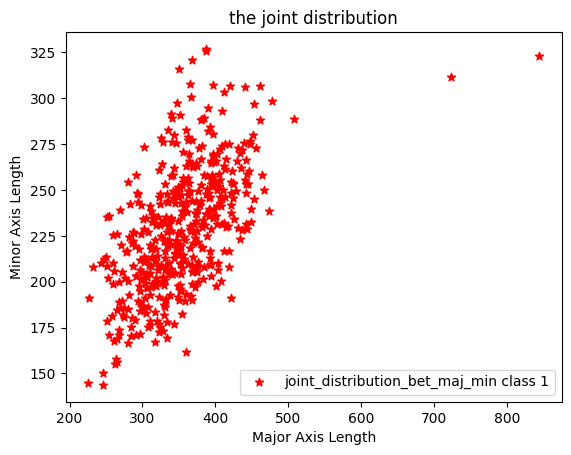

In [671]:
import matplotlib.pyplot as plt
p1=cls1[:,1]


p2=cls1[:,2]
plt.scatter(p1,p2,marker='*',c='r',label='joint_distribution_bet_maj_min class 1')
plt.xlabel("Major Axis Length")
plt.ylabel("Minor Axis Length")
plt.title("the joint distribution")
plt.legend()
# plots relation between the major and minor axis length 

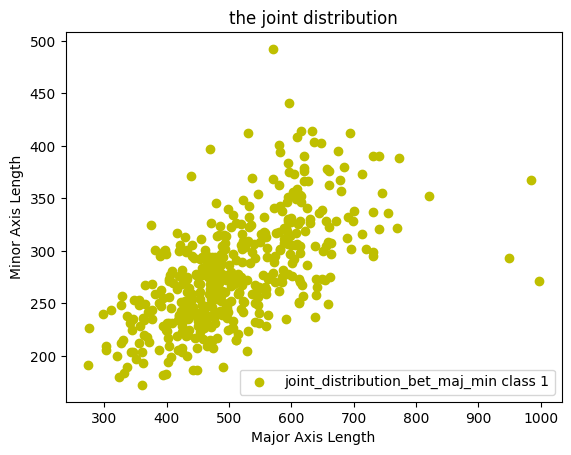

In [672]:
p1=cls2[:,1]

p2=cls2[:,2]
plt.scatter(p1,p2,marker='o',c='y',label='joint_distribution_bet_maj_min class 1')
plt.xlabel("Major Axis Length")
plt.ylabel("Minor Axis Length")
plt.title("the joint distribution")
plt.legend()


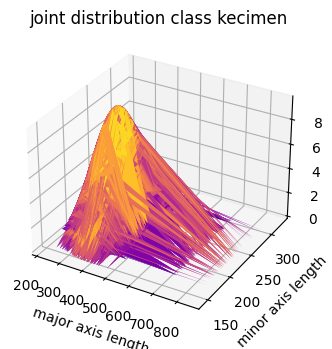

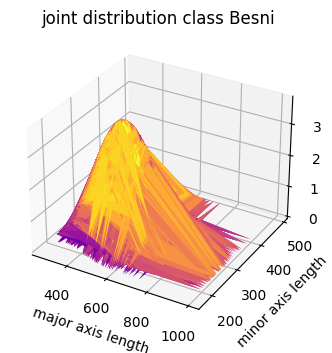

In [673]:

from scipy.stats import multivariate_normal

from mpl_toolkits.mplot3d import Axes3D


majorc1 = cls1[:, 1]           #uses only the major and minor length columns 
minorc1 = cls1[:, 2]

majorc2 = cls2[:, 1]
minorc2 = cls2[:, 2]


#  mean and covariance for each class
mean_c1 = np.mean(cls1[:, 1:3], axis=0)
cov_c1 = np.cov(cls1[:, 1:3], rowvar=False)                  # mean and cov for only the above mentioned features are calculated

mean_c2 = np.mean(cls2[:, 1:3], axis=0)
cov_c2 = np.cov(cls2[:, 1:3], rowvar=False)

# 3d plot for both the classes for major and minor axis length

def draw(maj,minor,mean,cov,classi):
    x,y=np.meshgrid(maj,minor)
    norm1=multivariate_normal.pdf(np.dstack((x,y)),mean,cov)
    fig=plt.figure(figsize=(13,11))
    ax=fig.add_subplot(133,projection='3d')
    ax.plot_surface(x,y,norm1,cmap='plasma')
    ax.set_title('joint distribution '+classi)
    ax.set_xlabel('major axis length')
    ax.set_ylabel('minor axis length')
    ax.set_zlabel(' distribution')
    plt.show()

draw(majorc1,minorc1,mean_c1,cov_c1,"class kecimen")
draw(majorc2,minorc2,mean_c2,cov_c2,"class Besni")






both the major axis length and the minor axis length are almost univariate normal since the grid plot shows a relatively smaller variance 

**funtional form of likelihood ratio**

In [674]:
from scipy.stats import multivariate_normal
y=x[500,:]


likly1 = multivariate_normal.pdf(y, mv1, cov1,allow_singular=True)
likly2 = multivariate_normal.pdf(y, mv2, cov2,allow_singular=True)                   # likelihood ratio  g1(x)/g2(x) 

loglikrat=(likly1/likly2)
if loglikrat >1:
    print("class1")
else :
    print("class2")



class2


**discriminant function for each class**

In [675]:


pc1 = 0.5      # already found out from above classes
pc2 = 0.5       #already found form above
from openpyxl.workbook import Workbook
headers=['data','class']                           # starts the excel file 
name='output.xlsx'
wb=Workbook()
file=wb.active 
file.title='datas'
file.append(headers)



# discriminant functions for each data point
for i, dat in enumerate(x):
  
    loglikec1 = multivariate_normal.logpdf(dat, mv1, cov1,allow_singular=True)                  # loglikelihood 
    loglikec2 = multivariate_normal.logpdf(dat, mv2, cov2,allow_singular=True)

    #  discriminant functions
    dicrc1 = np.log(pc1) + loglikec1                      #discriminant functions for both the classes 
    discrc2 = np.log(pc2) + loglikec2
    

     #class based on discriminant functions
    if dicrc1 > discrc2:
        classn = "KECIMEN"
    else:
        classn = "BESNI"
    x=['data:'+str(i+1),classn]
    file.append(x)
    wb.save(filename=name)

       
        



In [676]:
for row in file.iter_rows(values_only=True):
    print(row)            # printing in excel

('data', 'class')
('data:1', 'KECIMEN')
('data:2', 'KECIMEN')
('data:3', 'KECIMEN')
('data:4', 'KECIMEN')
('data:5', 'KECIMEN')
('data:6', 'KECIMEN')
('data:7', 'KECIMEN')
('data:8', 'KECIMEN')
('data:9', 'KECIMEN')
('data:10', 'KECIMEN')
('data:11', 'KECIMEN')
('data:12', 'KECIMEN')
('data:13', 'KECIMEN')
('data:14', 'KECIMEN')
('data:15', 'KECIMEN')
('data:16', 'KECIMEN')
('data:17', 'KECIMEN')
('data:18', 'KECIMEN')
('data:19', 'KECIMEN')
('data:20', 'KECIMEN')
('data:21', 'KECIMEN')
('data:22', 'KECIMEN')
('data:23', 'KECIMEN')
('data:24', 'BESNI')
('data:25', 'KECIMEN')
('data:26', 'KECIMEN')
('data:27', 'KECIMEN')
('data:28', 'KECIMEN')
('data:29', 'KECIMEN')
('data:30', 'KECIMEN')
('data:31', 'KECIMEN')
('data:32', 'KECIMEN')
('data:33', 'KECIMEN')
('data:34', 'KECIMEN')
('data:35', 'KECIMEN')
('data:36', 'KECIMEN')
('data:37', 'KECIMEN')
('data:38', 'KECIMEN')
('data:39', 'KECIMEN')
('data:40', 'KECIMEN')
('data:41', 'BESNI')
('data:42', 'KECIMEN')
('data:43', 'KECIMEN')
('data

pooling covariance of all classes

In [677]:
S=pc1*cov1+pc2*cov2    # pooling
headers=['data','class']
name='pool.xlsx'
wb=Workbook()
file3=wb.active 
file3.title='datas 3 '
file3.append(headers)



#  discriminant functions for each data point
for l, dat in enumerate(k):
    # Calculate log-likelihoods for both classes
    loglikec1 = multivariate_normal.logpdf(dat, mv1, S,allow_singular=True)           #pooled likelihhood  for both classes
    loglikec2 = multivariate_normal.logpdf(dat, mv2, S,allow_singular=True)

    #  discriminant functions
    dicrc1 = np.log(pc1) + loglikec1
    discrc2 = np.log(pc2) + loglikec2
    

    #  class based on discriminant functions
    if dicrc1 > discrc2:
        classn = "KECIMEN"
    else:
        classn = "BESNI"
    x=['data:'+str(l+1),classn]
    file3.append(x)
    wb.save(filename=name)
for row in file3.iter_rows(values_only=True):
    print(row)

('data', 'class')
('data:1', 'BESNI')
('data:2', 'BESNI')
('data:3', 'BESNI')
('data:4', 'KECIMEN')
('data:5', 'KECIMEN')
('data:6', 'KECIMEN')
('data:7', 'KECIMEN')
('data:8', 'KECIMEN')
('data:9', 'KECIMEN')
('data:10', 'KECIMEN')
('data:11', 'BESNI')
('data:12', 'KECIMEN')
('data:13', 'KECIMEN')
('data:14', 'KECIMEN')
('data:15', 'KECIMEN')
('data:16', 'KECIMEN')
('data:17', 'KECIMEN')
('data:18', 'KECIMEN')
('data:19', 'KECIMEN')
('data:20', 'KECIMEN')
('data:21', 'KECIMEN')
('data:22', 'KECIMEN')
('data:23', 'KECIMEN')
('data:24', 'KECIMEN')
('data:25', 'BESNI')
('data:26', 'KECIMEN')
('data:27', 'KECIMEN')
('data:28', 'KECIMEN')
('data:29', 'KECIMEN')
('data:30', 'KECIMEN')
('data:31', 'BESNI')
('data:32', 'KECIMEN')
('data:33', 'KECIMEN')
('data:34', 'KECIMEN')
('data:35', 'KECIMEN')
('data:36', 'KECIMEN')
('data:37', 'KECIMEN')
('data:38', 'KECIMEN')
('data:39', 'KECIMEN')
('data:40', 'KECIMEN')
('data:41', 'BESNI')
('data:42', 'KECIMEN')
('data:43', 'KECIMEN')
('data:44', 'KEC

In [678]:
flsbsn = 0
trukeci = 0
trubsn = 0
flskeci = 0

for i, row in enumerate(file.iter_rows(values_only=True)):
    if row[1] == 'BESNI' and i <450 :                              # finiding the accuracy
        flsbsn += 1
    elif row[1] == 'KECIMEN' and i < 450:
        trukeci += 1
    elif row[1] == 'BESNI' and i >= 450:
        trubsn += 1
    else:
        flskeci += 1

  
confusion=[[trukeci,flskeci],[flsbsn,trubsn]]          # creating thre confusion matrix


confusion matrix

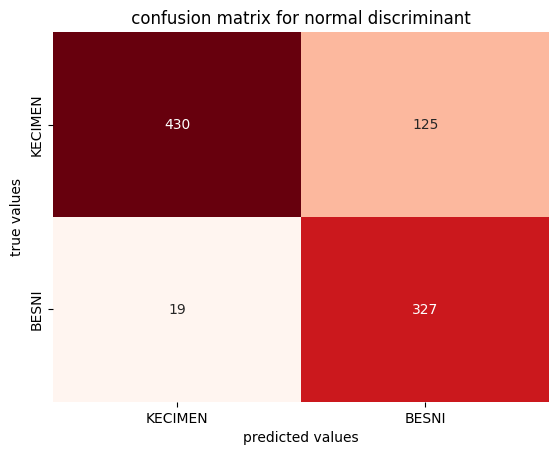

the accuracy is  0.8411111111111111


In [679]:
import seaborn as sns
plt.title("Confusion Matrix")

sns.heatmap(confusion,annot=True,fmt='d',cmap='Reds',cbar=False,
            xticklabels=['KECIMEN','BESNI'],
            yticklabels=['KECIMEN','BESNI'])
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title(" confusion matrix for normal discriminant ")
plt.show()                                                # confusion matrix from heatmap
accuracy=(trukeci+trubsn)/900
print("the accuracy is ",accuracy)


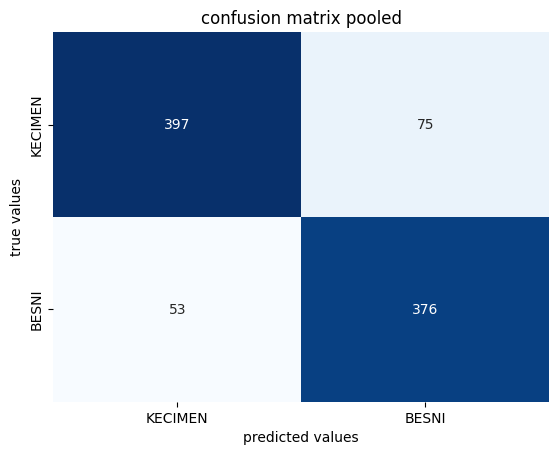

the accuracy is  0.8588888888888889


In [680]:
flsbsn = 0
trukeci = 0
trubsn = 0
flskeci = 0

for i, row in enumerate(file3.iter_rows(values_only=True)):
    
    if row[1] == 'BESNI' and i <=450 :
        flsbsn += 1
    elif row[1] == 'KECIMEN' and i <= 450:
        trukeci += 1
    elif row[1] == 'BESNI' and i > 450:
        trubsn += 1
    else:
        flskeci += 1


confusion=[[trukeci,flskeci],[flsbsn,trubsn]]
import seaborn as sns
plt.title("Confusion Matrix")

sns.heatmap(confusion,annot=True,fmt='d',cmap='Blues',cbar=False,    # confusion matrix for the pooled data 
            xticklabels=['KECIMEN','BESNI'],
            yticklabels=['KECIMEN','BESNI'])
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title("confusion matrix pooled")
plt.show()
accuracy=(trukeci+trubsn)/900
print("the accuracy is ",accuracy)


4 fold cross validation

In [681]:
shuf = df.sample(frac = 1)
cls=shuf.to_numpy()
cls[:,0:7]                     # shuffling the data


array([[140897.        ,    588.0709185 ,    308.0257871 ,
             0.8518473 , 146231.        ,      0.7339991 ,
          1536.473     ],
       [100835.        ,    419.7533709 ,    306.9548981 ,
             0.68208338, 102881.        ,      0.75257863,
          1202.369     ],
       [192815.        ,    731.4402924 ,    337.1023722 ,
             0.88746518, 196576.        ,      0.73439904,
          1803.686     ],
       [187391.        ,    660.6555881 ,    362.3150066 ,
             0.83620475, 189799.        ,      0.71394663,
          1682.478     ],
       [ 85739.        ,    380.3703785 ,    288.2561589 ,
             0.65245183,  87052.        ,      0.76215154,
          1094.576     ],
       [ 54321.        ,    395.01184   ,    182.3239807 ,
             0.88710594,  58632.        ,      0.62506904,
          1021.989     ],
       [ 96920.        ,    447.5951038 ,    277.4359099 ,
             0.78473076, 100285.        ,      0.68725891,
          1229.91 

In [682]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( cls[:,0:7], cls[:,7], test_size=0.25, random_state=25) # splitting 

In [683]:
me1=[0,0,0,0,0,0,0]
me2=[0,0,0,0,0,0,0]
for i in range(y_train.size):
    if y_train[i]==0:
        me1=me1+X_train[i,:]               #taking the mean
    else:
        me2=me2+X_train[i,:]


In [684]:
me1=me1/np.count_nonzero(y_train==0)
me2=me2/np.count_nonzero(y_train==1)


In [685]:
ymod1=y_test.squeeze()
full_test = np.concatenate((X_test,ymod1[:, None]), axis=1)
ymod2=y_train.squeeze()      # changing y to fit the model
full_train=np.concatenate((X_train,ymod2[:,None]),axis=1)


In [686]:
sort_tst=np.argsort(full_test[:,7])
sort_trn=np.argsort(full_train[:,7])
sortix = np.argsort(full_test[:,7])
test = full_test[sortix, :]            # sorting to classify both classes
train=full_train[sort_trn,:]

In [687]:

train[np.count_nonzero(y_train==0),0:]

array([77985.        ,   473.3407049 ,   214.0920312 ,     0.89186583,
       82967.        ,     0.67437738,  1214.981     ,     1.        ])

In [688]:

trncls1=train[0:np.count_nonzero(y_train==0),0:7]
trncls2=train[np.count_nonzero(y_train==0):y_train.size,0:7]  # training set for class 1 and 2
trncls2.shape

(343, 7)

covariance of both


In [689]:
trncov1=np.cov(trncls1,rowvar=False)
trncov1         # training covariance

array([[ 3.33681078e+08,  1.01779221e+06,  5.53591868e+05,
         8.66862896e+01,  3.59040990e+08, -3.46193429e+01,
         2.75618731e+06],
       [ 1.01779221e+06,  3.83358167e+03,  1.26446949e+03,
         2.41251680e+00,  1.13117646e+06, -5.89524808e-01,
         9.35290985e+03],
       [ 5.53591868e+05,  1.26446949e+03,  1.20440173e+03,
        -1.25397792e+00,  5.78158697e+05,  2.25686270e-01,
         4.13308848e+03],
       [ 8.66862896e+01,  2.41251680e+00, -1.25397792e+00,
         8.11274803e-03,  1.38374018e+02, -1.26557238e-03,
         2.71153700e+00],
       [ 3.59040990e+08,  1.13117646e+06,  5.78158697e+05,
         1.38374018e+02,  3.93795742e+08, -9.30816996e+01,
         3.07205675e+06],
       [-3.46193429e+01, -5.89524808e-01,  2.25686270e-01,
        -1.26557238e-03, -9.30816996e+01,  1.99900077e-03,
        -1.35963846e+00],
       [ 2.75618731e+06,  9.35290985e+03,  4.13308848e+03,
         2.71153700e+00,  3.07205675e+06, -1.35963846e+00,
         2.4993072

In [690]:
trncov2=np.cov(trncls2,rowvar=False)
trncov2
             #training covariance for class 2 

array([[ 1.45867533e+09,  3.46419961e+06,  1.72498653e+06,
         2.08194054e+02,  1.50309435e+09,  3.09815988e+02,
         8.61732714e+06],
       [ 3.46419961e+06,  1.05294010e+04,  3.16233127e+03,
         3.26619454e+00,  3.66932609e+06, -8.22519163e-01,
         2.35370817e+04],
       [ 1.72498653e+06,  3.16233127e+03,  2.55299000e+03,
        -1.16793199e+00,  1.75976473e+06,  8.50374530e-01,
         9.32116763e+03],
       [ 2.08194054e+02,  3.26619454e+00, -1.16793199e+00,
         4.69552839e-03,  2.60942171e+02, -1.35003446e-03,
         3.93338903e+00],
       [ 1.50309435e+09,  3.66932609e+06,  1.75976473e+06,
         2.60942171e+02,  1.56499350e+09,  1.91887847e+02,
         9.14165499e+06],
       [ 3.09815988e+02, -8.22519163e-01,  8.50374530e-01,
        -1.35003446e-03,  1.91887847e+02,  3.77440755e-03,
        -1.23822321e+00],
       [ 8.61732714e+06,  2.35370817e+04,  9.32116763e+03,
         3.93338903e+00,  9.14165499e+06, -1.23822321e+00,
         5.7201833

In [691]:

pc1 =np.count_nonzero(y_test==0)
pc2 = np.count_nonzero(y_test==1)
from openpyxl.workbook import Workbook
headers=['data','class']
name='test.xlsx'
wb2=Workbook()
file2=wb2.active 
file2.title='datas2'
file2.append(headers)

tr=test[:,0:7]
ytr=test[:,7]


#  discriminant functions for each data point

for j, dat in enumerate(tr):
    #  log likelihoods for both classes
    logliketc1 = multivariate_normal.logpdf(dat, me1, trncov1,allow_singular=True)
    logliketc2 = multivariate_normal.logpdf(dat, me2, trncov2,allow_singular=True)

    #  discriminant functions
    discrtc1 = np.log(pc1) + logliketc1
    discrtc2 = np.log(pc2) + logliketc2
    

    #  class based on discriminant functions
    if discrtc1 > discrtc2:
        classn = "KECIMEN"
    else:
        classn = "BESNI"
    x=['data:'+str(j+1),classn]
    file2.append(x)
    wb.save(filename=name)
       
        
for row in file2.iter_rows(values_only=True):
    print(row)


('data', 'class')
('data:1', 'KECIMEN')
('data:2', 'KECIMEN')
('data:3', 'KECIMEN')
('data:4', 'KECIMEN')
('data:5', 'KECIMEN')
('data:6', 'KECIMEN')
('data:7', 'KECIMEN')
('data:8', 'KECIMEN')
('data:9', 'KECIMEN')
('data:10', 'KECIMEN')
('data:11', 'KECIMEN')
('data:12', 'KECIMEN')
('data:13', 'KECIMEN')
('data:14', 'KECIMEN')
('data:15', 'KECIMEN')
('data:16', 'KECIMEN')
('data:17', 'KECIMEN')
('data:18', 'KECIMEN')
('data:19', 'KECIMEN')
('data:20', 'KECIMEN')
('data:21', 'KECIMEN')
('data:22', 'KECIMEN')
('data:23', 'KECIMEN')
('data:24', 'KECIMEN')
('data:25', 'KECIMEN')
('data:26', 'KECIMEN')
('data:27', 'KECIMEN')
('data:28', 'KECIMEN')
('data:29', 'BESNI')
('data:30', 'KECIMEN')
('data:31', 'KECIMEN')
('data:32', 'KECIMEN')
('data:33', 'KECIMEN')
('data:34', 'KECIMEN')
('data:35', 'KECIMEN')
('data:36', 'KECIMEN')
('data:37', 'KECIMEN')
('data:38', 'KECIMEN')
('data:39', 'KECIMEN')
('data:40', 'KECIMEN')
('data:41', 'KECIMEN')
('data:42', 'KECIMEN')
('data:43', 'KECIMEN')
('da

In [692]:
flsbsn = 0
trukeci = 0
trubsn = 0
flskeci = 0

for i, row in enumerate(file2.iter_rows(values_only=True)):
    if(i<225):
        if row[1] == 'BESNI'  and ytr[i]==0:
            flsbsn += 1
        elif row[1] == 'KECIMEN' and ytr[i]==0:
            trukeci += 1
        elif row[1] == 'BESNI' and ytr[i]==1:        # to check the accuracy
            trubsn += 1
        else:
            flskeci += 1


confusion=[[trukeci,flskeci],[flsbsn,trubsn]]



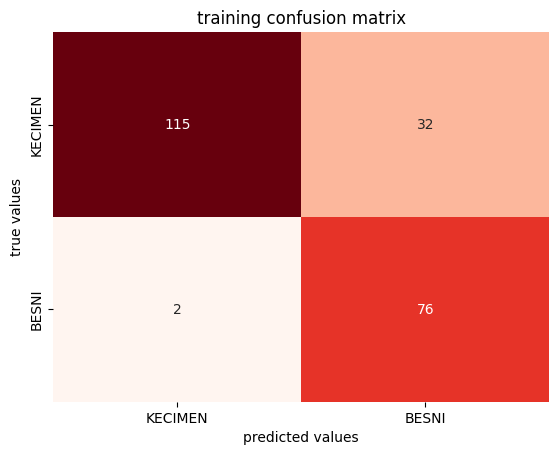

In [693]:
confusion

import seaborn as sns
plt.title("Confusion Matrix")

sns.heatmap(confusion,annot=True,fmt='d',cmap='Reds',cbar=False,
            xticklabels=['KECIMEN','BESNI'],
            yticklabels=['KECIMEN','BESNI'])
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title("training confusion matrix")          # confusion matrix for the training data
plt.show()



In [694]:
full_test

array([[ 73499.        ,    346.0510824 ,    275.5139073 ,
             0.60507902,  76355.        ,      0.73124602,
          1050.012     ,      0.        ],
       [ 69312.        ,    373.8031053 ,    237.1945766 ,
             0.77288661,  70719.        ,      0.70615563,
          1001.236     ,      0.        ],
       [ 92121.        ,    432.0619001 ,    275.6906108 ,
             0.76996901,  95197.        ,      0.71544734,
          1193.836     ,      1.        ],
       [ 54983.        ,    292.8989067 ,    248.4080201 ,
             0.52983369,  58095.        ,      0.72527371,
           921.613     ,      0.        ],
       [ 57127.        ,    311.6445775 ,    238.6419206 ,
             0.64313802,  59943.        ,      0.69362555,
           952.023     ,      0.        ],
       [ 71284.        ,    356.2592463 ,    256.4883397 ,
             0.6940274 ,  72618.        ,      0.74297507,
          1011.054     ,      0.        ],
       [119026.        ,    612.74

In [695]:
full_train[:,7].size

pc1=np.count_nonzero(full_train[:,7]==0)/np.size(full_train[:,7])
pc1
pc2=1-pc1
pc2
tstcov1=np.cov(full_test[:,0:7])


In [696]:


S1=pc1*trncov1+pc2*trncov2
mv1=[0,0,0,0,0,0,0]
mv2=[0,0,0,0,0,0,0]
for i in range(full_train[:,7].size):
    if full_train[i,7]==0:
        mv1=mv1+full_train[i,0:7]
    else:
        mv2=mv2+full_train[i,0:7]
mv1=mv1/np.count_nonzero(full_train[:,7]==0)
mv2=mv2/np.count_nonzero(full_train[:,7]==1)

headers=['data','class']
name='pool2.xlsx'
wb=Workbook()
file4=wb.active 
file4.title='datas3'
file4.append(headers)



#  discriminant functions for each data point
for l, dat in enumerate( full_test[:,0:7]):
    
    #  log likelihoods for both classes
    loglikec1 = multivariate_normal.logpdf(dat, mv1, S,allow_singular=True)
    loglikec2 = multivariate_normal.logpdf(dat, mv2, S,allow_singular=True)            #pooled likelihoods

    #  discriminant functions
    dicrc1 =loglikec1
    discrc2 =loglikec2
    

    #  the class based on discriminant functions
    if dicrc1 > discrc2:
        classn = "KECIMEN"
    else:
        classn = "BESNI"
    x=['data:'+str(l+1),classn]
    file4.append(x)
    wb.save(filename=name)
for row in file4.iter_rows(values_only=True):
    print(row)



('data', 'class')
('data:1', 'KECIMEN')
('data:2', 'KECIMEN')
('data:3', 'BESNI')
('data:4', 'KECIMEN')
('data:5', 'KECIMEN')
('data:6', 'KECIMEN')
('data:7', 'BESNI')
('data:8', 'KECIMEN')
('data:9', 'KECIMEN')
('data:10', 'KECIMEN')
('data:11', 'KECIMEN')
('data:12', 'KECIMEN')
('data:13', 'KECIMEN')
('data:14', 'KECIMEN')
('data:15', 'BESNI')
('data:16', 'KECIMEN')
('data:17', 'KECIMEN')
('data:18', 'BESNI')
('data:19', 'KECIMEN')
('data:20', 'KECIMEN')
('data:21', 'KECIMEN')
('data:22', 'KECIMEN')
('data:23', 'KECIMEN')
('data:24', 'KECIMEN')
('data:25', 'KECIMEN')
('data:26', 'KECIMEN')
('data:27', 'KECIMEN')
('data:28', 'KECIMEN')
('data:29', 'KECIMEN')
('data:30', 'BESNI')
('data:31', 'KECIMEN')
('data:32', 'KECIMEN')
('data:33', 'BESNI')
('data:34', 'KECIMEN')
('data:35', 'KECIMEN')
('data:36', 'KECIMEN')
('data:37', 'KECIMEN')
('data:38', 'BESNI')
('data:39', 'BESNI')
('data:40', 'KECIMEN')
('data:41', 'BESNI')
('data:42', 'BESNI')
('data:43', 'KECIMEN')
('data:44', 'BESNI')
(

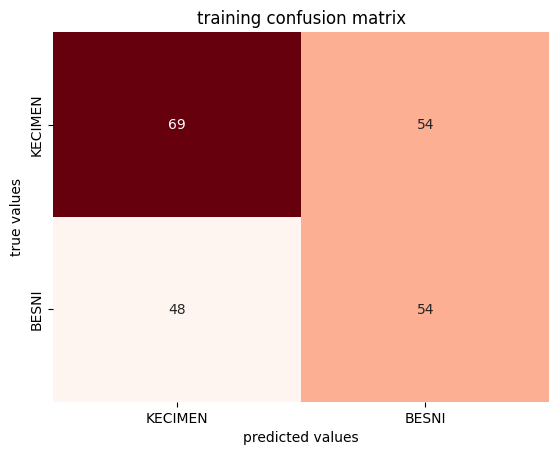

In [697]:

flsbsn = 0
trukeci = 0
trubsn = 0
flskeci = 0

for i, row in enumerate(file4.iter_rows(values_only=True)):
    if(i<225):
        if row[1] == 'BESNI'  and ytr[i]==0:
            flsbsn += 1
        elif row[1] == 'KECIMEN' and ytr[i]==0:
            trukeci += 1
        elif row[1] == 'BESNI' and ytr[i]==1:
            trubsn += 1
        else:
            flskeci += 1


confusion=[[trukeci,flskeci],[flsbsn,trubsn]]
import seaborn as sns
plt.title("Confusion Matrix")                                      # confusion matrix for pooled 

sns.heatmap(confusion,annot=True,fmt='d',cmap='Reds',cbar=False,
            xticklabels=['KECIMEN','BESNI'],
            yticklabels=['KECIMEN','BESNI'])
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title("training confusion matrix")
plt.show()



In [698]:
t

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [699]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


X = c
y = t
y=y.ravel()


model = LinearRegression()
kf = KFold(n_splits=4,shuffle=True)
eff=[]
truneg=0
falsneg=0
falspos=0
trupos=0

for tri, tei in kf.split(X,y):
    #  dataset into train and test sets for this fold
    X_train, X_test = X[tri], X[tei]
    y_train, y_test = y[tri], y[tei]
     

   
    class_0_data = X_train[y_train == 0]
    class_1_data = X_train[y_train == 1]

    class_0_targets = y_train[y_train == 0]                       # multiple folds are made and covariance and mean are obtained 
    class_1_targets = y_train[y_train == 1]
    mv1=np.mean(class_0_data,axis=0)
    cov1=np.cov(class_0_data,rowvar=False)
    mv2=np.mean(class_1_data,axis=0)
    cov2=np.cov(class_1_data,rowvar=False)
    for l, dat in enumerate( X_test):
    
    #  log-likelihoods for both classes
        loglikec1 = multivariate_normal.logpdf(dat, mv1, cov1,allow_singular=True)
        loglikec2 = multivariate_normal.logpdf(dat, mv2, cov2,allow_singular=True)
        dicrc1 =loglikec1
        discrc2 =loglikec2
        if dicrc1>discrc2 and y_test[l]==0:
            truneg=truneg+1
        elif dicrc1>discrc2 and y_test[l]==1:
             falsneg=falsneg+1
        elif dicrc1<discrc2 and y_test[l]==0:
            falspos=falspos+1
        else:
            trupos=trupos+1
print("for normal distribution")
print("average true negative is",truneg/4)
print("average false negative is ",falsneg/4)                             # accuracy is determined 
print("average false positive is ",falspos/4)
print("average  true positive is ",trupos/4)


for normal distribution
average true negative is 107.5
average false negative is  31.0
average false positive is  5.0
average  true positive is  81.5


In [700]:


model = LinearRegression()




kf = KFold(n_splits=4,shuffle=True)



eff=[]
truneg=0
falsneg=0
falspos=0
trupos=0
# Iterate over each fold
for tri, tei in kf.split(X,y):
    # Split the dataset into train and test sets for this fold
    X_train, X_test = X[tri], X[tei]
    y_train, y_test = y[tri], y[tei]
    class_0_data = X_train[y_train == 0]
    class_1_data = X_train[y_train == 1]

    class_0_targets = y_train[y_train == 0]             # accuracy for the pooled covariance 
    class_1_targets = y_train[y_train == 1]
    mv1=np.mean(class_0_data,axis=0)
    cov1=np.cov(class_0_data,rowvar=False)
    mv2=np.mean(class_1_data,axis=0)
    cov2=np.cov(class_1_data,rowvar=False)
    S=(np.count_nonzero(y_train==0)/225)*cov1+(np.count_nonzero(y_train==1)/225)*cov2
    for l, dat in enumerate( X_test):
    
    #  log-likelihoods for both classes
        loglikec1 = multivariate_normal.logpdf(dat, mv1, S,allow_singular=True)
        loglikec2 = multivariate_normal.logpdf(dat, mv2, S,allow_singular=True)
        dicrc1 =loglikec1
        discrc2 =loglikec2
        if dicrc1>discrc2 and y_test[l]==0:
            truneg=truneg+1
        elif dicrc1>discrc2 and y_test[l]==1:
             falsneg=falsneg+1
        elif dicrc1<discrc2 and y_test[l]==0:
            falspos=falspos+1
        else:
            trupos=trupos+1
print("pooled")
print("average true negative is",truneg/4)
print("average false negative is ",falsneg/4)
print("average false positive is ",falspos/4)
print("average  true positive is ",trupos/4)

pooled
average true negative is 99.5
average false negative is  18.5
average false positive is  13.0
average  true positive is  94.0


In [701]:
eff=[]
for tri, tei in kf.split(X):
    X_train, X_test = X[tri], X[tei]
    y_train, y_test = y[tri], y[tei]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred.round())
    eff.append(accuracy)
print(eff)                             # finding the best accuracy

[0.8666666666666667, 0.8533333333333334, 0.8444444444444444, 0.84]


ques 5.#each of the folds have good accuracy score the pooled funciton has the best accuracy score .the best perfomance is the  second fold.#

part 3 

In [702]:
cls=df.to_numpy()
x=np.delete(cls,7,1)
x.shape

(900, 7)

In [703]:
y_con=np.delete(x,np.s_[0:4],1)
y_con=np.delete(y_con,np.s_[1:3],1)
x=np.delete(x,4,1)
head=list(df.columns.values)


In [704]:

head=['Area',
 'MajorAxisLength',
 'MinorAxisLength',
 'Eccentricity',
 'Extent',
 'Perimeter',]

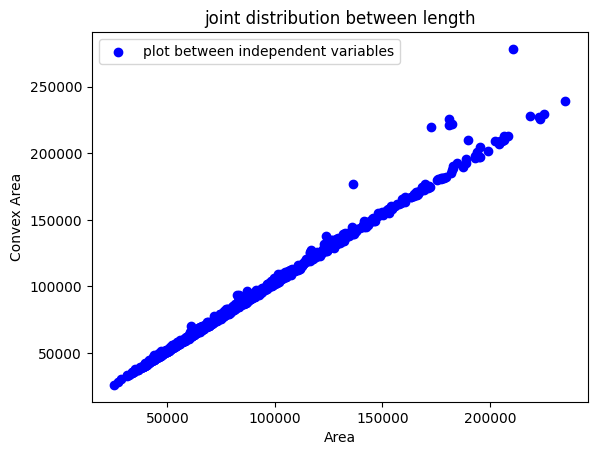

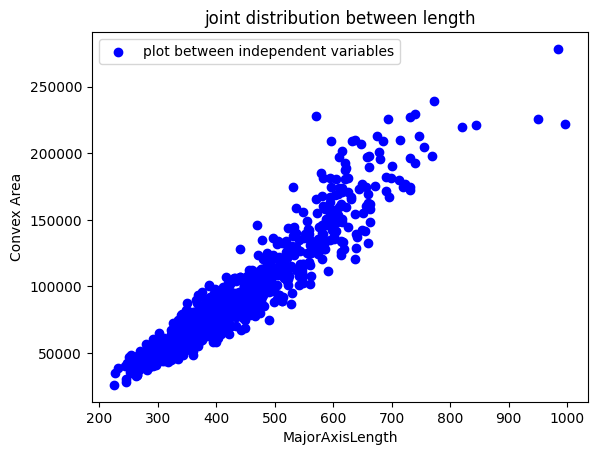

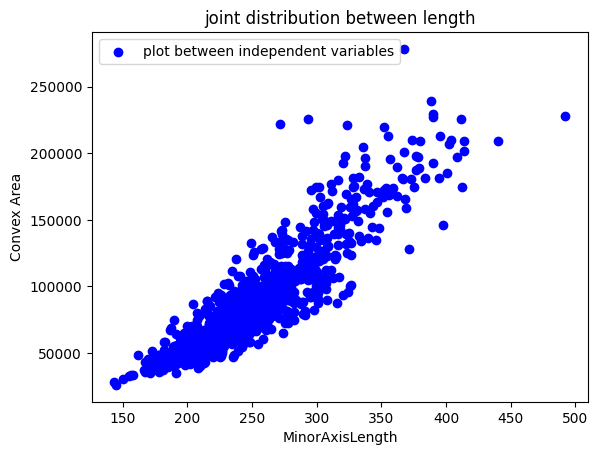

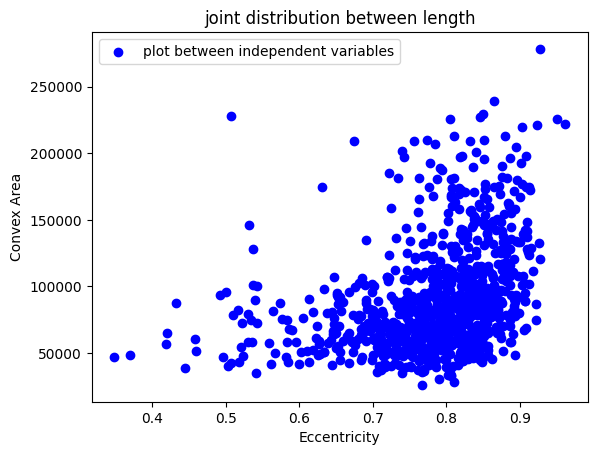

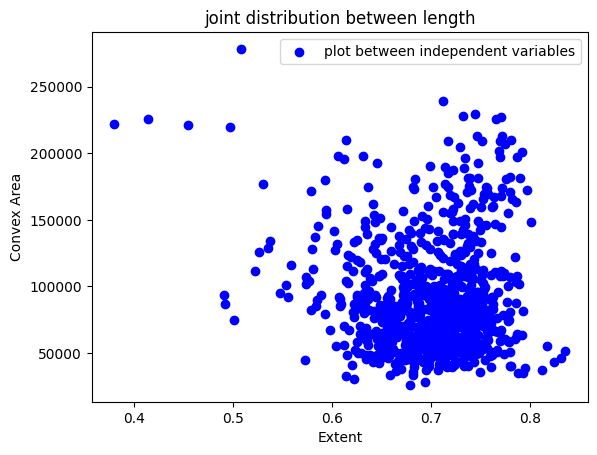

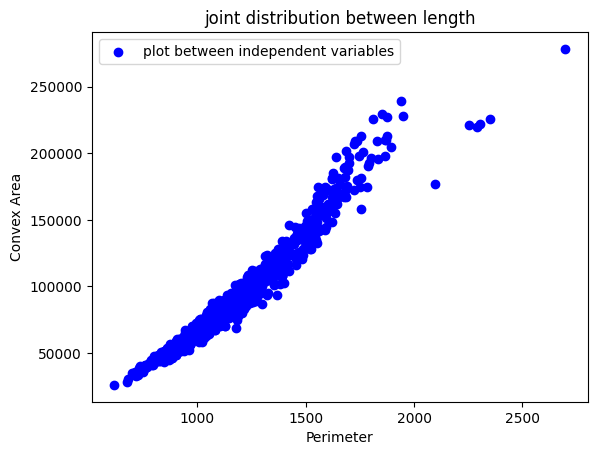

In [705]:

for i in range (6):
    plt.scatter(x[:,i],y_con,c='b',label= 'plot between independent variables')
    plt.xlabel(head[i])
    plt.ylabel('Convex Area')
    plt.title("joint distribution between length")
    plt.legend()
    plt.show()

In [706]:
x.shape

(900, 6)

In [707]:
train6=x[0:600,:]  # 600 samples taken
test6=x[600:,:]

In [708]:
train6.shape

(600, 6)

In [709]:
y6=y_con[:600,:]
y6test=y_con[600:,:]

In [710]:
y6test.shape

(300, 1)

In [711]:
df3=df.drop(['Class'],axis=1)
df3=df3.drop(['ConvexArea'],axis=1)


ques 2 the 

In [712]:
df3

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,0.792772,1073.251
...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,0.658798,1258.548


In [713]:
cor=df3.corr()
np.asanyarray(cor)

print("first column has the highest dependency")
print(cor)

first column has the highest dependency
                     Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
Area             1.000000         0.932774         0.906650      0.336107   
MajorAxisLength  0.932774         1.000000         0.728030      0.583608   
MinorAxisLength  0.906650         0.728030         1.000000     -0.027683   
Eccentricity     0.336107         0.583608        -0.027683      1.000000   
Extent          -0.013499        -0.203866         0.145322     -0.361061   
Perimeter        0.961352         0.977978         0.827417      0.447845   

                   Extent  Perimeter  
Area            -0.013499   0.961352  
MajorAxisLength -0.203866   0.977978  
MinorAxisLength  0.145322   0.827417  
Eccentricity    -0.361061   0.447845  
Extent           1.000000  -0.173449  
Perimeter       -0.173449   1.000000  


ques 2 ; The model has a less causal relation as the correlation matrix does not imply  much dependent realtion  but ther is a causal relation between area majoraxislengtth minoraxislength and perimeter since thier corresponding values in the correlation matrix is same

3 linear regression model

In [714]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(train6,y6)
model.coef_


array([[     0.92800831,    -89.26580424,   -125.00945543,
        -14483.22544262,   1019.63203919,     76.34060719]])

area has the highest effect as understood from the coefficients .

In [715]:
predicted=model.predict(test6) #predicting the model


In [716]:
print(predicted)

[[ 96034.68109157]
 [135599.6132867 ]
 [ 79712.15649614]
 [139730.32614071]
 [105587.50810397]
 [171732.51947638]
 [ 83404.36042321]
 [ 59888.07841687]
 [112002.55546382]
 [127021.61836549]
 [ 86601.72904028]
 [ 74156.7163158 ]
 [130705.20536001]
 [122543.19796424]
 [ 63805.16859695]
 [110358.61971434]
 [198648.22512102]
 [132227.61744728]
 [109677.8867809 ]
 [115321.89291612]
 [ 85181.44466072]
 [145629.4074025 ]
 [198545.60860103]
 [143943.59801159]
 [ 81390.23061567]
 [100644.32548082]
 [112190.9213828 ]
 [106641.6300379 ]
 [110601.32274239]
 [ 92172.58399522]
 [103094.45764838]
 [ 97179.83236594]
 [ 87759.34331563]
 [ 56334.88978025]
 [177803.59636878]
 [ 72658.20419665]
 [107487.55544612]
 [167737.55039613]
 [104844.8430648 ]
 [ 74700.03340517]
 [ 96237.39409609]
 [135187.01887823]
 [ 83974.16934108]
 [108801.26050816]
 [124477.58321862]
 [118368.41899239]
 [ 88990.81089326]
 [ 80515.42705826]
 [ 77295.46002145]
 [115670.49266012]
 [195371.58603274]
 [110266.96965382]
 [101383.698

In [717]:
from sklearn.metrics import mean_squared_error

k=mean_squared_error(y6test,predicted)
k

4975404.393285055

q4 : it does not have ave good perfomance because ofthe high mean squared error so it is not a good regression model

principal component analysis on training data matrix 

based on 3 variables are mostly linearly independent as thier coefficients varry significantly . linear regression model doesnt fit the data properly as there is a high error . thus leads to underfitting and less generalisation in the data

In [718]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)                    # pca fitting
fitpca=pca.fit_transform(test6)

In [719]:
fitpca

array([[-19282.76137796,    114.99397675,    -33.98890775,
            -4.23283804,      0.10588068,      0.00286722],
       [ 20489.36779453,    -22.00890098,     59.08405734,
            -4.12804672,      0.05994513,     -0.01155967],
       [-34038.43642941,     55.25221313,    -34.48354678,
             1.57536688,     -0.04534058,     -0.00302766],
       [ 27176.40929875,    -23.69000468,      4.02591809,
            -3.47458126,     -0.0153468 ,     -0.01046944],
       [ -6991.28622654,    -28.77527629,     26.02828383,
            -6.52020677,      0.06928269,     -0.00741079],
       [ 60074.96343571,    -35.29003667,    -27.04748215,
            -0.47408953,      0.04712288,      0.00250078],
       [-30700.73337881,    -22.65591884,     33.93231991,
             0.00888589,      0.06997845,      0.00408718],
       [-54683.99976378,     33.31736318,    -27.62614289,
            13.3669861 ,      0.03420454,     -0.02430787],
       [ -7564.41161856,    124.18788918,     10

In [720]:
varpca=pca.explained_variance_ratio_
print("variance explained by each principal component",varpca)           # the variace is determined 

variance explained by each principal component [0.9999946  0.00000482 0.00000055 0.00000003 0.         0.        ]


pareto chart

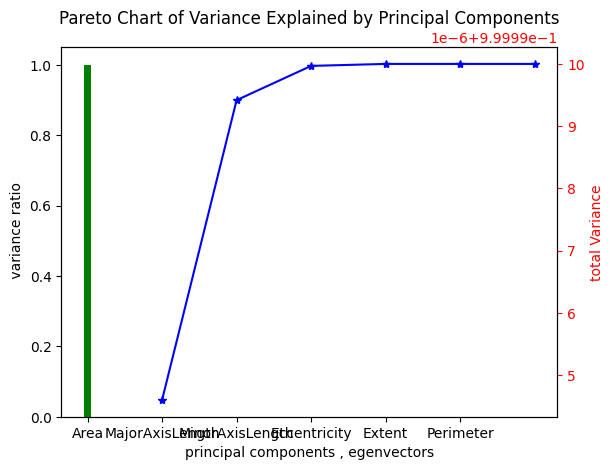

In [721]:
totvar=np.cumsum(varpca)


fig,ax1=plt.subplots()
ax1.bar(head,varpca,color='green',width=0.1)
ax1.set_xlabel("principal components , egenvectors")     # drawing the ratio of variances 
ax1.set_ylabel(" variance ratio")
ax2 = ax1.twinx()
ax2.plot(range(1, 6 + 1), totvar, 'b', marker='*', label='total Variance')
ax2.set_ylabel('total Variance', color='r')
ax2.tick_params('y', colors='r')                      #pareto chart

plt.title('Pareto Chart of Variance Explained by Principal Components')
plt.show()

In [722]:
df3

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,0.792772,1073.251
...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,0.658798,1258.548


In [723]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


In [724]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split( cls[:,0:3], cls[:,4], test_size=0.25, random_state=25)
model = LinearRegression()

model.fit(X_train, y_train)

p=model.predict(X_test)
mse = mean_squared_error(y_test, p)
print("the mean squared error is ",mse)
 
pca=PCA()
pca.fit(X_train,y_train)
pp=pca.fit_transform(X_test)               #calculating the mean squared error and the pca function 
pca.explained_variance_ratio_

the mean squared error is  3891872.266776692


array([0.99999874, 0.00000115, 0.0000001 ])

ques 9; suppose a situation like housing price prediction has some factors like proximity to school that increases the price but this may be not a generalized case as this situation may not apply in all cases. in such a case PCA can reduce the dimensionality efficiently by reducing such unnecessary factors. when we are considering the price of a phone with specifications. mostly all the factors such as specifications can easily be quantifiable and are limited. any reduction in dimensionality would reduce the information available thus PCA may not be used.

References 
